.. meta::
   :description: A guide which introduces the most important steps to get started with pymoo, an open-source multi-objective optimization framework in Python.

.. meta::
   :keywords: Multi-objective Optimization, Python, Evolutionary Computation, Optimization Test Problem, Hypervolume

# Source Code

In this guide, we have provided a couple of options for defining your problem and how to run the optimization. 
You might have already copied the code into your IDE. However, if not, the following code snippets cover the problem definition, algorithm initializing, solving the optimization problem, and visualization of the non-dominated set of solutions altogether.

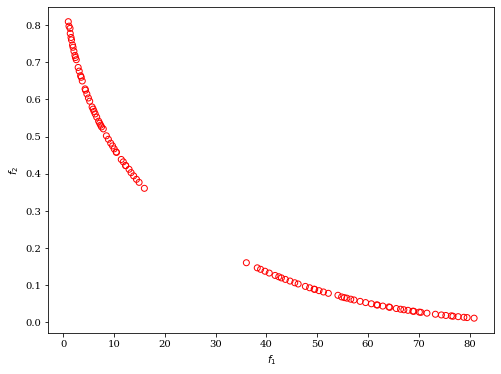

In [1]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([-2, -2]),
                         xu=np.array([2, 2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0] ** 2 + x[1] ** 2)
        f2 = (x[0] - 1) ** 2 + x[1] ** 2

        g1 = 2 * (x[0] - 0.1) * (x[0] - 0.9) / 0.18
        g2 = - 20 * (x[0] - 0.4) * (x[0] - 0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               verbose=False,
               seed=1)

plot = Scatter()
plot.add(res.F, edgecolor="red", facecolor="none")
plot.show()